In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Regression

In [4]:
#let's create a huge data set
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
#add some noise
noise = np.random.randn(len(x_data))

In [6]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

b = 5

In [7]:
y_true = (0.5* x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [9]:
x_df

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004
5,0.00005
6,0.00006
7,0.00007
8,0.00008
9,0.00009


In [10]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])


In [11]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,5.431188
1,0.00001,4.455873
2,0.00002,3.945209
3,0.00003,6.289564
4,0.00004,6.029372


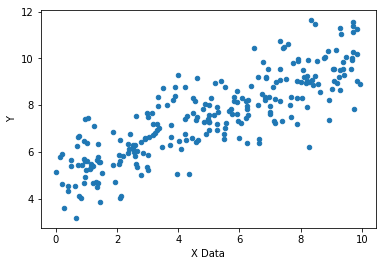

In [14]:
#let's plot a sample of the dataframe
my_data.sample(250).plot(kind = 'scatter',x = 'X Data',y = 'Y')

In [15]:
batch_size = 8

In [16]:
np.random.randn(2)

array([-0.89341978,  0.55701293])

In [17]:
m = tf.Variable(0.47)
b = tf.Variable(0.53)


In [18]:
#placeHolder
xph = tf.compat.v1.placeholder(tf.float32,shape=[batch_size])

In [19]:
yph= tf.compat.v1.placeholder(tf.float32,shape=[batch_size])

In [20]:
y_model = m*xph + b

In [21]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [22]:
#create an optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [23]:
init = tf.compat.v1.global_variables_initializer()

In [24]:
sess = tf.compat.v1.Session()

In [25]:
sess.run(init)

In [26]:
batches = 10000

for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    
    sess.run(train,feed_dict=feed)
    
model_m , model_b = sess.run([m,b])
    

In [27]:
model_m

0.50753933

In [28]:
model_b

5.015316

In [29]:
y_hat = x_data*model_m + model_b

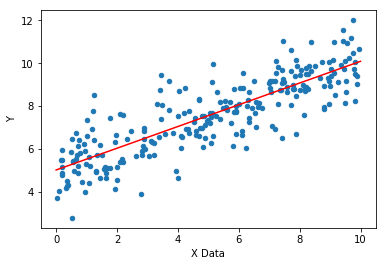

In [30]:
my_data.sample(250).plot(kind = 'scatter',x = 'X Data',y = 'Y')
plt.plot(x_data,y_hat,'r')


# TF-ESTIMATOR

In [31]:
# we only one feature here
feat_cols= [tf.feature_column.numeric_column('x',shape=[1])]

In [32]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_device_fn': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_train_distribute': None, '_is_chief': True, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_evaluation_master': '', '_task_id': 0, '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb3781d160>, '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h', '_save_summary_steps': 100, '_master': '', '_eval_distribute': None, '_experimental_distribute': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_service': None, '_protocol': None}


In [33]:
from sklearn.model_selection import  train_test_split

In [34]:
x_train , x_eval, y_train , y_eval = train_test_split(x_data,y_true,test_size = 0.3,random_state = 101
                                                     )

In [35]:
 x_train.shape

(700000,)

In [36]:
#inputs for the estimator
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,
                                                         shuffle=True)

In [37]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,
                                                                batch_size=8,num_epochs=1000,shuffle=False)

In [38]:
#basically it's test input function
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,
                                                                batch_size=8,num_epochs=1000,shuffle=False)

In [39]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h/model.ckpt.
INFO:tensorflow:loss = 55.01145, step = 0
INFO:tensorflow:global_step/sec: 7

In [40]:

train_metrics = estimator.evaluate(input_fn= train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-07T15:36:31Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-01-07-15:36:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0696828, global_step = 1000, label

In [41]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-07T15:36:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-01-07-15:36:34
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0904813, global_step = 1000, label/mean = 7.481114, loss = 1.0904813, prediction/mean = 7.372198
INFO:tensorflow:Saving '

In [42]:
print("TRAINING Data metrics")
print(train_metrics)

TRAINING Data metrics
{'label/mean': 7.490583, 'loss': 1.0696828, 'average_loss': 1.0696828, 'global_step': 1000, 'prediction/mean': 7.393495}


In [43]:
print("Testing(eval) Data Metrics")
print(eval_metrics)

Testing(eval) Data Metrics
{'label/mean': 7.481114, 'loss': 1.0904813, 'average_loss': 1.0904813, 'global_step': 1000, 'prediction/mean': 7.372198}


In [44]:
brand_new_data = np.linspace(0,10,10)

In [45]:

input_func_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False
                                                                 )

In [47]:
list(estimator.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.445929], dtype=float32)},
 {'predictions': array([5.1006484], dtype=float32)},
 {'predictions': array([5.7553678], dtype=float32)},
 {'predictions': array([6.410087], dtype=float32)},
 {'predictions': array([7.0648065], dtype=float32)},
 {'predictions': array([7.7195253], dtype=float32)},
 {'predictions': array([8.374245], dtype=float32)},
 {'predictions': array([9.028965], dtype=float32)},
 {'predictions': array([9.683683], dtype=float32)},
 {'predictions': array([10.338404], dtype=float32)}]

In [48]:
predictions = []

for pred in estimator.predict(input_fn=input_func_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7q/8q9qcyfs6qb0f2k65mrj00x80000gn/T/tmpkz2tls4h/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [49]:
predictions

[array([4.445929], dtype=float32),
 array([5.1006484], dtype=float32),
 array([5.7553678], dtype=float32),
 array([6.410087], dtype=float32),
 array([7.0648065], dtype=float32),
 array([7.7195253], dtype=float32),
 array([8.374245], dtype=float32),
 array([9.028965], dtype=float32),
 array([9.683683], dtype=float32),
 array([10.338404], dtype=float32)]

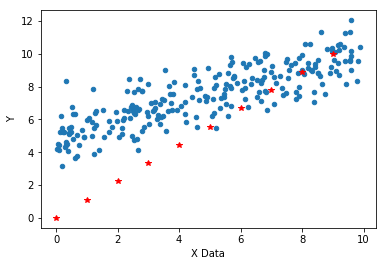

In [56]:

my_data.sample(250).plot(kind = 'scatter',x = 'X Data', y = 'Y')
plt.plot(brand_new_data,'r*')